## Desafío - Gráficos y correlación

**Mi nombre:** Nicolás Gómez
 
**Profesor:** Gabriel Tamayo

**Generación:** G2




* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

 ### 1 - Importar librerías y .csv
 
 * Importe las librerías básicas para el análisis de datos
 * Descarge e importe el archivo nations.csv. **Warning: va a encontrar un error en el formato (códificación del archivo es "ISO-8859-1") ¿Cómo lo podemos solucionar?.**
 
La base de datos contiene información a nivel mundial sobre demografía:

* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
* Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school .

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('nations.csv', encoding = "ISO-8859-1")

In [2]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999
5,6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.750000,NaN
6,7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN
7,8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN
8,9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.100000,NaN
9,10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.400000,NaN


Era un problema de encoding, basta con cambiarlo por uno que soporte los carácteres que UTF8 no soportaba

In [3]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

 ### 2 - Refactorización de gráficos matplotlib a seaborn
 
 A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide refactorizarlos utilizando seaborn. Para ellos se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
 

## A

``` python
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

```

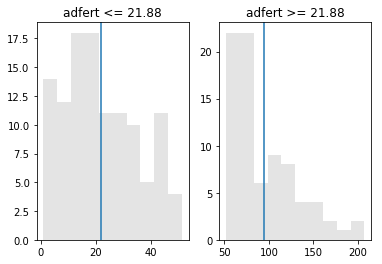

In [4]:
# Función Original

def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')

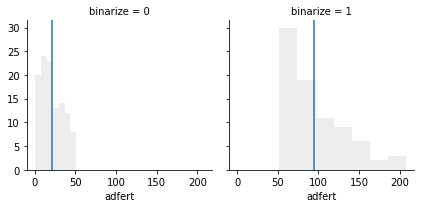

In [5]:
# Refactor de la función

def binarize_histogram_refactor(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    def distplot_with_mean(col, color):
        plt.axvline(np.mean(col))
        sns.distplot(col, color=color, kde=False)

    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2)
    grid = grid.map(distplot_with_mean, variable, color='lightgrey')
    
binarize_histogram_refactor(df, 'adfert')

## B

``` python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')
```

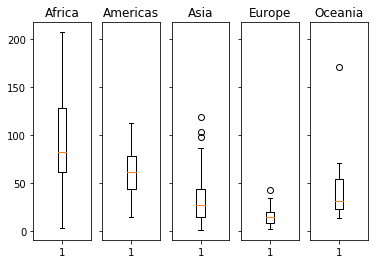

In [6]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe.copy()
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

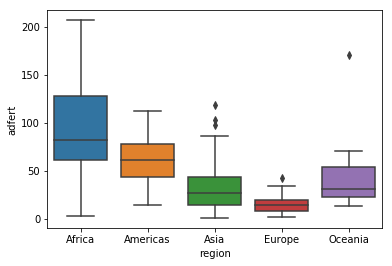

In [7]:
def grouped_boxplot_refactor(dataframe, variable, group_by):
    sns.boxplot(x=group_by, y=variable, data=dataframe)

grouped_boxplot_refactor(df, 'adfert', 'region')

## C

``` python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')
```

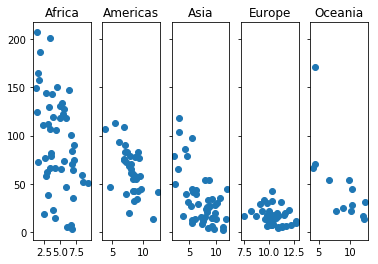

In [8]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe.copy()
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')

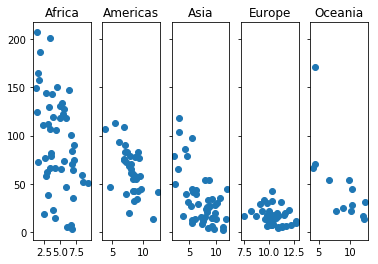

In [9]:
def grouped_scatterplot_refactor(dataframe, x, y, group_by):
    grid = sns.FacetGrid(dataframe, col=group_by)
    grid = grid.map(sns.scatterplot, x, y)

grouped_scatterplot(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables.
En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [10]:
cols = ['chldmort', 'adfert', 'life']

In [11]:
correlations = df.iloc[:, 3:].corr()
correlations

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
gdp,1.000000,0.573280,-0.517120,-0.516019,0.611219,-0.053251,0.656482,0.009827,0.442487,0.826819,-0.079037
school,0.573280,1.000000,-0.675219,-0.772668,0.725207,-0.058784,0.565080,0.094663,0.854910,0.416818,-0.201446
adfert,-0.517120,-0.675219,1.000000,0.777416,-0.731787,-0.004868,-0.451075,0.032290,-0.676430,-0.437615,0.354003
chldmort,-0.516019,-0.772668,0.777416,1.000000,-0.923563,-0.005432,-0.556266,0.137984,-0.790070,-0.416292,0.063676
life,0.611219,0.725207,-0.731787,-0.923563,1.000000,0.005418,0.623945,-0.174210,0.664518,0.445990,-0.025493
pop,-0.053251,-0.058784,-0.004868,-0.005432,0.005418,1.000000,-0.066228,-0.057245,-0.030396,-0.023302,-0.015499
urban,0.656482,0.565080,-0.451075,-0.556266,0.623945,-0.066228,1.000000,-0.165942,0.478254,0.522432,0.138066
femlab,0.009827,0.094663,0.032290,0.137984,-0.174210,-0.057245,-0.165942,1.000000,-0.075675,-0.101363,-0.049513
literacy,0.442487,0.854910,-0.676430,-0.790070,0.664518,-0.030396,0.478254,-0.075675,1.000000,0.349137,-0.028563
co2,0.826819,0.416818,-0.437615,-0.416292,0.445990,-0.023302,0.522432,-0.101363,0.349137,1.000000,-0.110875


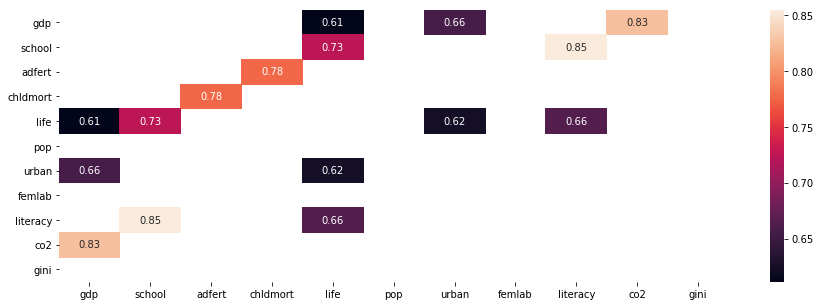

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(correlations[(correlations > 0.6) & (correlations < 1)], annot=True)

Vemos que las variables con mayor correlación son:

- `school` y `literacy` (0.85)
- `co2` y `gdp` (0.83)
- `adfert` y `chldmort` (0.78)

## 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,
['variables', 'a', 'agregar']] . No olvide agregar la variable region .
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [13]:
cols = ['school', 'literacy', 'co2', 'gdp', 'adfert', 'chldmort']

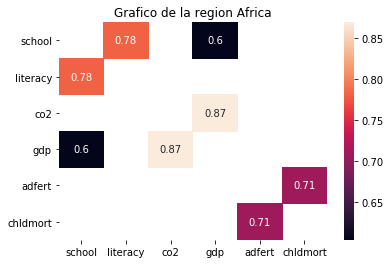

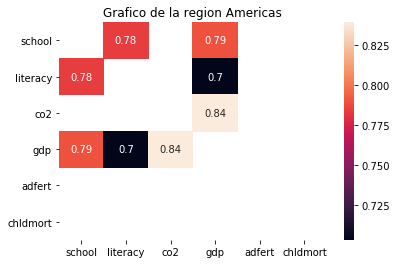

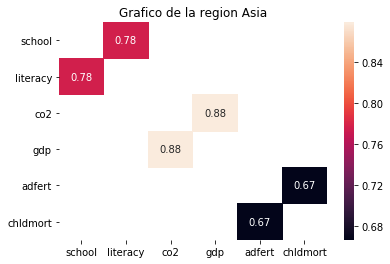

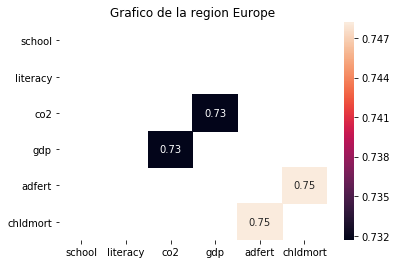

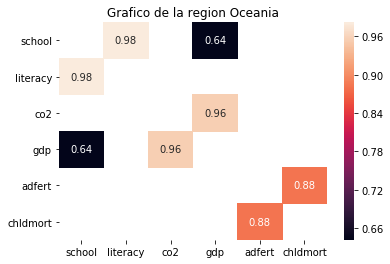

In [14]:
tmp = df[cols + ['region']]

for name, group in tmp.groupby(['region']):
    M = group.corr()
    plt.title('Grafico de la region {}'.format(name))
    sns.heatmap(M[(M > 0.6) & (M < 1)], annot=True)
    plt.show()

- La correlación de `gdp` con `co2` se mantiene entre las mayores entre todas las regiones
- Oceania es el único país donde la correlación entre `school` y `literacy` es la mayor (casi perfecto!)

Cuando hay harto dinero (GDP) hay baja emisión de CO2, lo cual hace sentido, aunque habría que hacer otra prueba para ver si una explica a la otra.

### Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.

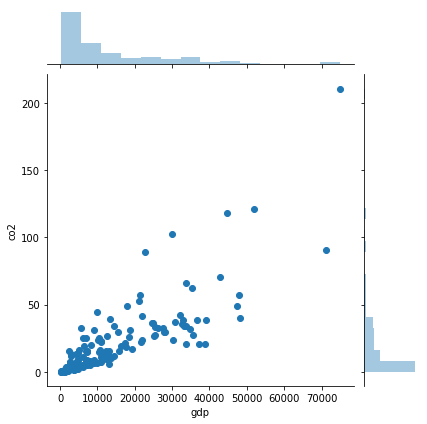

In [15]:
# Para GDP y CO2

sns.jointplot(df['gdp'], df['co2'])

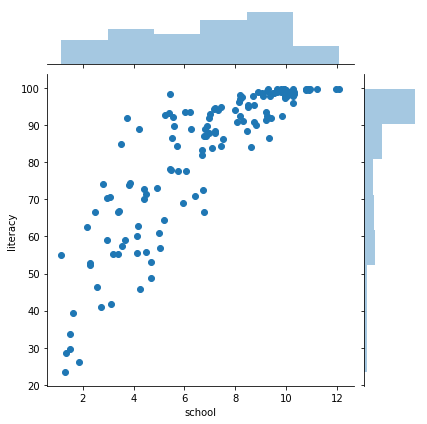

In [16]:
sns.jointplot(df['school'], df['literacy'])

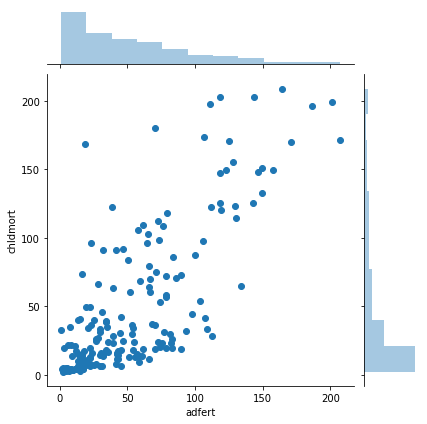

In [17]:
sns.jointplot(df['adfert'], df['chldmort'])